# Entrega N° 8 - Storytelling


|Autor|Fecha|
|:----:|:----:|
|Francisco Tagliavini|2024-02-01|


## Motivo

Determinación de capacidad adquisitiva de las personas, ingreso anual

## Audiencia

Puede haber intereses respecto a nivel academico obtenido.
Para entidades de crédito de acuerdo a capacidad de pago.

## Contexto comercial

Brindar información de de capacidad de ingreso y crédito de las personas.
Para poder determinar si tiene capacidad de pago de deuda.

## OBJETIVO:

Se propone predecir mediante ML si una persona puede superar un cierto ingreso anual o no.
En este análisis el resultado presenta solo 2 opciones, siendo la variable categórica y dicotómica.['<50k' ; '>50k']
El dataset propuesto ya cuente con información de la variable a predecir.
En este escenario el MODELO propuesto es de CLASIFICACIÓN.

Asimismo, las categorías existentes del datasets nos permiten poder trabajar con algunas relaciones e intentar establecer si existe algun tipo de correlación más alta entre algunas de estas con otras variables ademas de la variable objetivo.

Para este tipo de análisis se puede utilizar el método de Hipótesis nula, en dónde proponemos una conclusión a la que debemos rechazar, por ejemplo:

* Las mujeres tienen ingrresos significativamente más bajos que los hombre
* Las persinas que trabajan menos horas tienen ingresos significativamente más bajos
* Las personas de raza ' Amer-Indian-Eskimo' tienen ingresos mas bajos
* Las personas de america latina tienen ingresos menores
* Las personas con mayores niveles de educación alcanzados son mayormente casados

Las condiciones de rechazo, se establecen a partir de un humbral de confiabibilidad, en donde se observa que la condicion de la Hipótesis nula queda por fuera del nivel de confiaza, esta es rechazada - indicando que no hay información suficiente en la muestra (o dataset) que permita validar la hipótesis planteada.

Para una primera aproximación, con un análisis bivariado mediante una gráfica de mapa de puntos (scatter plot) se prodría visualizar si existe algún tipo de relación.


## Interes por análisis del dataset con un método no supervisado [Parte II]

Se prodría analizar el DataSet sin el valor de la etiqueta, analizar mediante un sistema no supervisado y analizar mediate el método k-mains y el método de codos si el posible detetar más categorías.


# Cargo las librerias que voy a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 1.- Leo el dataset (archivo.csv)
* Me fijo si se lee bien con los primeros 3 registros

In [2]:
df = pd.read_csv('dataset.csv')
df.head(3)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


# 2.- Analisis exploratorio de datos (EDA)

## 2.1.- Acercamiento al dataset

### Pruebo con el método info()
Resumen del dataset luego de la carga

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      48842 non-null  int64 
 1   age             48842 non-null  int64 
 2   workclass       47879 non-null  object
 3   fnlwgt          48842 non-null  int64 
 4   education       48842 non-null  object
 5   education-num   48842 non-null  int64 
 6   marital-status  48842 non-null  object
 7   occupation      47876 non-null  object
 8   relationship    48842 non-null  object
 9   race            48842 non-null  object
 10  sex             48842 non-null  object
 11  capital-gain    48842 non-null  int64 
 12  capital-loss    48842 non-null  int64 
 13  hours-per-week  48842 non-null  int64 
 14  native-country  48568 non-null  object
 15  income          48842 non-null  object
dtypes: int64(7), object(9)
memory usage: 6.0+ MB


# sigo analizando el tamaño del data set
Determino cunatos registros tiene el dataset y sus campos

In [4]:
df.shape

(48842, 16)

## Analizo los campos numericos media, mediana, min, max y percentiles
Analizo solo los campos que son numéricos para establecer las variaciones, dispersión y demas valores de tendencia central para tener una idea/detalle del campo

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,48842.0,24420.500000,14099.615261,0.0,12210.25,24420.5,36630.75,48841.0
age,48842.0,38.643585,13.710510,17.0,28.00,37.0,48.00,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.50,178144.5,237642.00,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.00,10.0,12.00,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.00,0.0,0.00,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.00,0.0,0.00,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.00,40.0,45.00,99.0


## Veo los campos disponibles
Listo todos los nombres de las columnas

In [6]:
df.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

## Consulto por lo tipos de datos de los campos del dataset...
Veo que tipo de datos tiene cada campos del dataset

In [7]:
df.dtypes

Unnamed: 0         int64
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


## Modelo de ML de clasificación o supervisado en donde ya se encuentra dentro del data set una muestra del universo de ingresos con datos de la variable
## El objetivo es encontrar un modelo a partir de un entrenamiento (FIT) basado en una fracción del dataset para luego realizar una prueba (TEST) del modelo para obtener una buena predicción y así poder realizar predicciones para futuros casos

## **Distribución de la variable dependiente **
### Vamos a conocer como es la variable a determinar

<Axes: xlabel='income'>

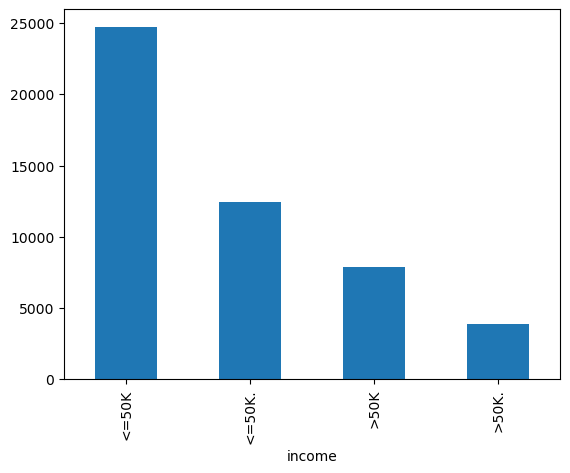

In [8]:
df['income'].value_counts().plot(kind='bar')

# Diccionario de campos y variables

* age numerico entero - puedo analizar la distribución de rango etarios de la población del dataset (74 categorias de edad)
* workclass: string (8 categorias) hay un valor no definido 
* fnlwgt: 
* education: string (16 categorias)
* education-num: numerico entero
* marital-status: string (7 categorias)
* occupation: string (15 categorias)
* relationship: string (6 categorias)
* race: string (6 categorias)
* sex: string (2 categorias)
* capital-gain:
* capital-loss:
* hours-per-week:
* native-country:
* income:

## 2.2.- Exploración y Limpieza de datos

##### Manupulación de datos, vistas, formatos, automatización de ETL

##### Detección de nulos, detección de duplicados, detección de outliers

##### Determinacion de métodos de rellenados/reemplazo/eliminación (cuantitativo - cualitativo/categórico)

##### Creación de nuevos campos - categorias

In [9]:
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Elimino la columna 'Unnamed:0'
#### sobre el mismo dataframe

In [10]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<Axes: xlabel='education-num', ylabel='education'>

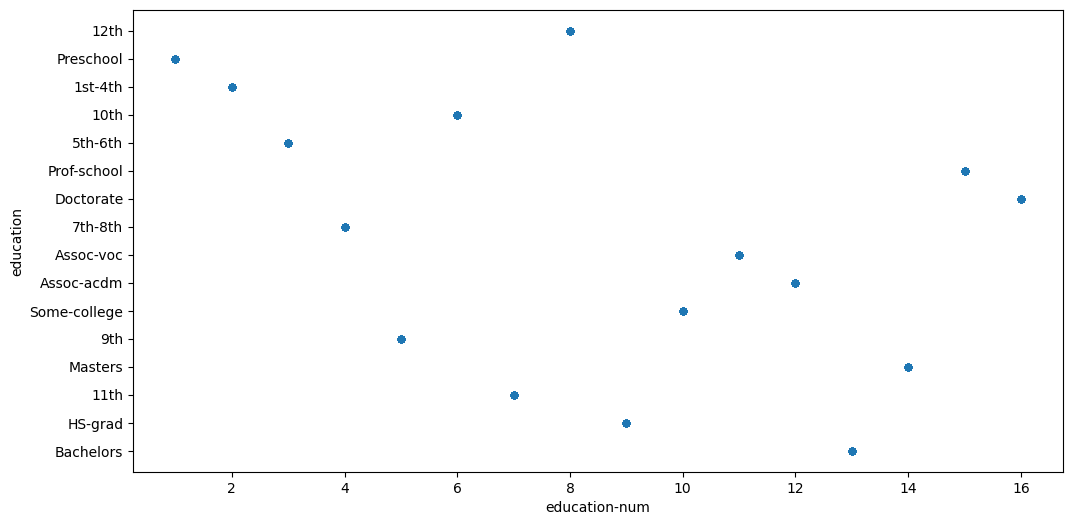

In [11]:
df.plot(kind="scatter",     # Create a scatterplot
              x='education-num',          # Put carat on the x axis
              y='education',          # Put price on the y axis
              figsize=(12,6))

### Acá vemos que hay una relación biunívoca (biyectiva) entre 'education' y 'education-num'
### es decir representan lo mismo, este valor esta duplicado y no aporta valor al dataset
### se propone eliminar

In [12]:
df.drop('education-num', axis=1,inplace=True)
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
df['capital-gain'].value_counts()

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
22040        1
2387         1
1639         1
1111         1
6612         1
Name: count, Length: 123, dtype: int64

In [14]:
df['capital-loss'].value_counts()

capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
1870        1
1911        1
2465        1
1421        1
Name: count, Length: 99, dtype: int64

## los campos de 'capital-gain' y 'capital-loss' tienen la mayor parte de los registros cargados con valor '0'
## no aportan nada concluyente - propongo eliminarlos

In [15]:
df.drop('capital-gain', axis=1,inplace=True)
df.drop('capital-loss', axis=1,inplace=True)
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


### 2.2.1.- MANEJO DE NULOS Y CARACTERES ESPECIALES

 #### Uso de la librería missigno

In [16]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import missingno as msno

<Axes: >

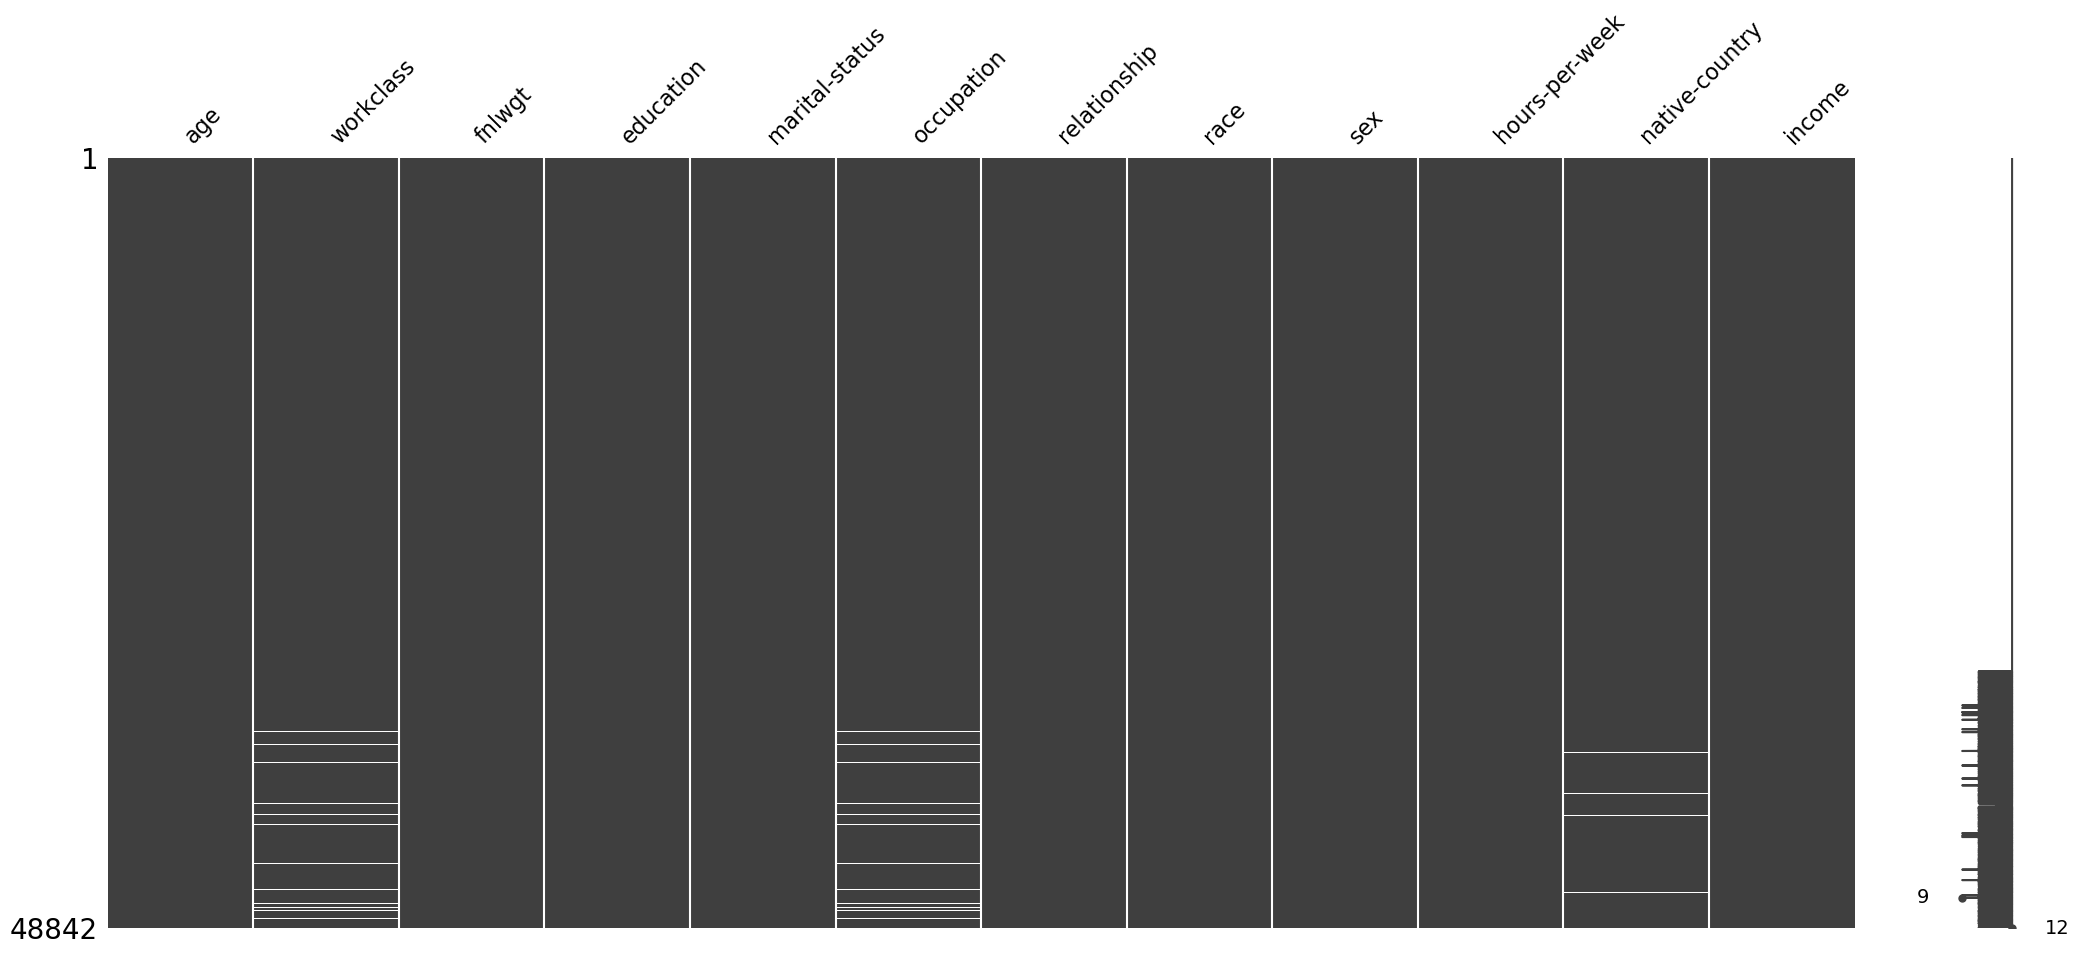

In [18]:
msno.matrix(df)

### Veo 3 columnas con valores nulos
### vamos a realizar un primer análisis de cada una

<Axes: xlabel='workclass'>

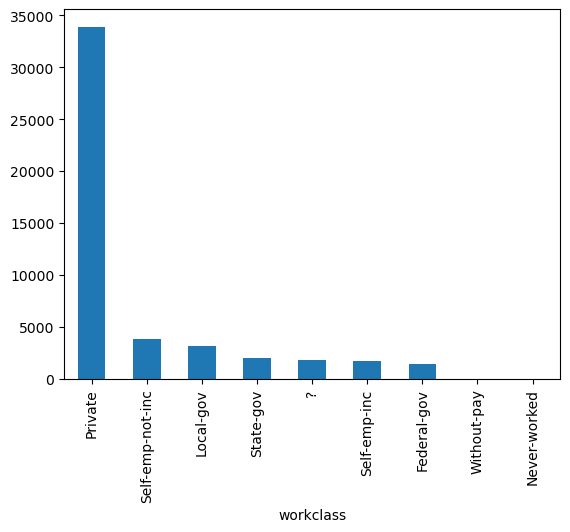

In [19]:
df['workclass'].value_counts().plot(kind='bar')

## Se observa que hay registros en el dataset 'workclass' con signo '?'
## Se debe analizar rellenado

<Axes: xlabel='occupation'>

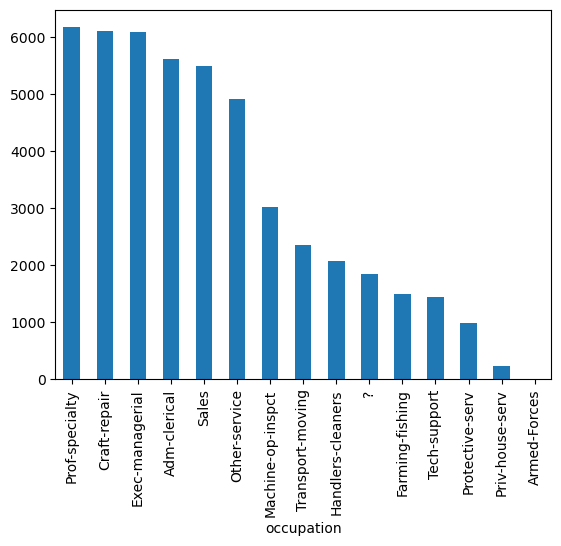

In [20]:
df['occupation'].value_counts().plot(kind='bar')

## Se observa que hay registros en el dataset 'occupation' con signo '?'
## Se debe analizar rellenado

<Axes: xlabel='native-country'>

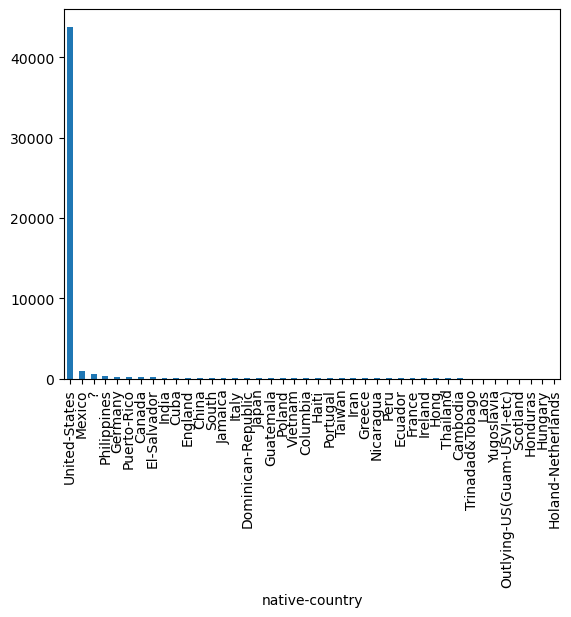

In [21]:
df['native-country'].value_counts().plot(kind='bar')

## Se observa que hay registros en el dataset 'native-country' con signo '?'
## Se debe analizar rellenado

In [22]:
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
hours-per-week      0
native-country    274
income              0
dtype: int64

## vamos a limpiar los registros '?'

In [23]:
pd.crosstab(index=df['occupation'],columns=df['workclass'])

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
occupation,,,,,,,,,
?,1836,0,0,7,0,0,0,0,0
Adm-clerical,0,487,421,0,4208,47,70,375,3
Armed-Forces,0,15,0,0,0,0,0,0,0
Craft-repair,0,93,211,0,4748,167,798,94,1
Exec-managerial,0,268,331,0,3995,617,587,287,1
Farming-fishing,0,9,43,0,670,82,653,25,8
Handlers-cleaners,0,36,65,0,1923,6,21,19,2
Machine-op-inspct,0,19,24,0,2882,17,59,19,2
Other-service,0,55,300,0,4057,42,276,191,2


### Si elimino los registros que tengan '?' limpio el datasets
### Si elimino por el campo ' occupation' elimino la categiría 'Never-worked'
### Total son 1843 registros sobre 48842

In [24]:
indices_borrar = df[df['occupation'] == '?'].index
df1 = df.drop(indices_borrar)

In [25]:
df1['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [26]:
df1['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked            3
Name: count, dtype: int64

In [27]:
df1.shape

(46999, 12)

In [28]:
df1.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
hours-per-week      0
native-country    274
income              0
dtype: int64

##### También parece que tienen la misma distribución de campos nulos
##### Vamos a verificarlo

In [29]:
#total de nulos en 'occupation'
df1['occupation'].isna().sum()

966

In [30]:
df1['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [31]:
#total de nulos en 'workclass'
df1['workclass'].isna().sum()

963

In [32]:
df1['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked            3
Name: count, dtype: int64

In [33]:
df1.loc[df1['workclass'].isna()][['workclass','occupation','native-country']].count()

workclass           0
occupation          0
native-country    944
dtype: int64

### Todos nan de 'workclass' son nan en 'occupation'

In [34]:
indice_nulos = df1[df1['workclass'].isna()].index
df1.drop(indice_nulos,inplace=True)
df1.shape

(46036, 12)

In [35]:
df1.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
marital-status      0
occupation          3
relationship        0
race                0
sex                 0
hours-per-week      0
native-country    255
income              0
dtype: int64

In [36]:
df1[df1['occupation'].isna()]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
41346,17,Never-worked,131593,11th,Never-married,NaN,Own-child,Black,Female,20,United-States,<=50K.
44168,20,Never-worked,273905,HS-grad,Married-spouse-absent,NaN,Other-relative,White,Male,35,United-States,<=50K.
46459,18,Never-worked,162908,11th,Never-married,NaN,Own-child,White,Male,35,United-States,<=50K.


### estos 3 registros corresponden a la categoría 'Never-worked'

In [37]:
indice_never_worked = df1[df1['occupation'].isna()].index
df1.drop(indice_never_worked, inplace=True)
df1.shape

(46033, 12)

In [38]:
df1.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
hours-per-week      0
native-country    255
income              0
dtype: int64

In [39]:
df1.loc[df1['native-country'].isna()]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
32580,40,Private,85019,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,45,NaN,>50K.
32626,41,Private,109912,Bachelors,Never-married,Other-service,Not-in-family,White,Female,40,NaN,<=50K.
32644,44,Self-emp-inc,223881,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,NaN,>50K.
32749,34,State-gov,513100,Bachelors,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,40,NaN,<=50K.
32814,42,Federal-gov,177937,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,40,NaN,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...
48245,46,Private,31411,11th,Married-civ-spouse,Other-service,Wife,White,Female,40,NaN,<=50K.
48272,24,Private,127159,Some-college,Never-married,Other-service,Other-relative,White,Female,24,NaN,<=50K.
48604,24,State-gov,161783,Bachelors,Never-married,Transport-moving,Not-in-family,Black,Male,40,NaN,<=50K.
48651,34,Private,143776,Masters,Never-married,Prof-specialty,Not-in-family,Black,Male,45,NaN,>50K.


## Me quedan estos 255 registros que no tienen 'native-country'
## Tengo que elegir 
### eliminar, rellenar con la moda (usa)

### CONCLUSIONES ELIMINAR NULOS
1.- El objetivo es poder predecir si una persona puede o no ganar más de U$S50k anualmente...
2.- Las personas que nunca trabajaron y participaron son muy pocas...pero es correcto que no hayan aportado ocupación.
3.- En total tenemos casi 49.000 registros
4.- Se observa que se indican horas de trabajo e incluso algunos han indicado ganancias
5.- Existe algún aporte/valor de información asociada a las personas que nunca trabajaron o las que no detallaron su occupación
6.- Es un segmento/muestra de la población válida, es posible inferir que no es suficientemente representativa

Se pueden eliminar los registros que tengan np.nan en los campos 'occupation' y 'workclass'


1.- Hay 1836 registros en los cuales no se informa 'occupation' ni 'workclass'
2.- hay registros que fueron registrados con '?' otros vacíos 'null'/'nan'
3.- Tienen ambos campos una correlación fuerte y se podría eliminar una.
4.- 'workclass' tiene 9 categorias
5.- 'occupation' tiene 15 categorias


### 2.2.2.- DUPLICADOS

In [40]:
df1.duplicated().sum()

31

In [41]:
df1[df1.duplicated()]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,Never-married,Craft-repair,Not-in-family,White,Male,40,Mexico,<=50K
5104,90,Private,52386,Some-college,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,35,United-States,<=50K
9171,21,Private,250051,Some-college,Never-married,Prof-specialty,Own-child,White,Female,10,United-States,<=50K
11631,20,Private,107658,Some-college,Never-married,Tech-support,Not-in-family,White,Female,10,United-States,<=50K
13084,25,Private,195994,1st-4th,Never-married,Priv-house-serv,Not-in-family,White,Female,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,Never-married,Farming-fishing,Not-in-family,White,Male,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
18555,30,Private,144593,HS-grad,Never-married,Other-service,Not-in-family,Black,Male,40,?,<=50K
18698,19,Private,97261,HS-grad,Never-married,Farming-fishing,Not-in-family,White,Male,40,United-States,<=50K
21318,19,Private,138153,Some-college,Never-married,Adm-clerical,Own-child,White,Female,10,United-States,<=50K


### No observo duplicados - en principio descarto hacer algo con estos registros

### 2.2.4.- Análisis de OUTLIERS

## Análisis descriptivos de otros campos

In [42]:
df1['age'].describe()

count    46033.000000
mean        38.556601
std         13.204268
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

<Axes: ylabel='count'>

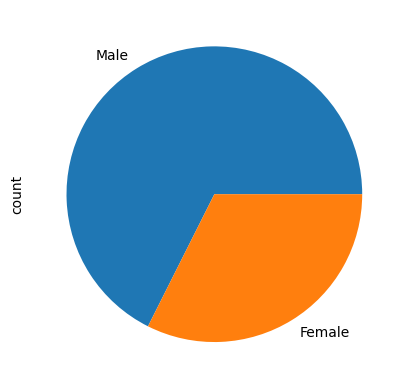

In [43]:
df1['sex'].value_counts().plot(kind='pie')

## más registros de hombres que mujeres

<Axes: xlabel='race'>

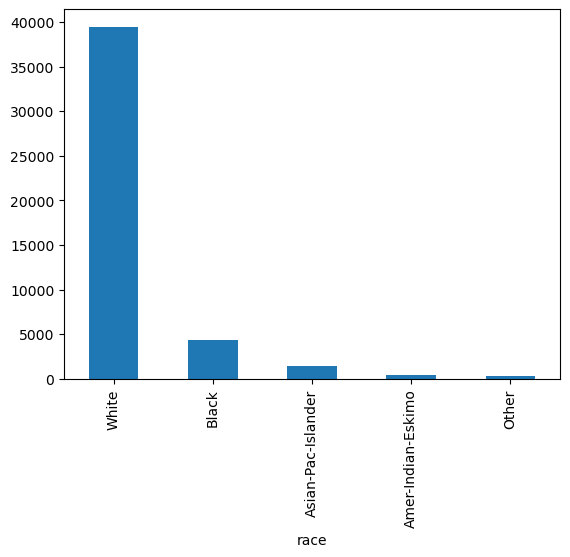

In [44]:
df1['race'].value_counts().plot(kind='bar')

## predominio de raza blanca

<Axes: xlabel='education'>

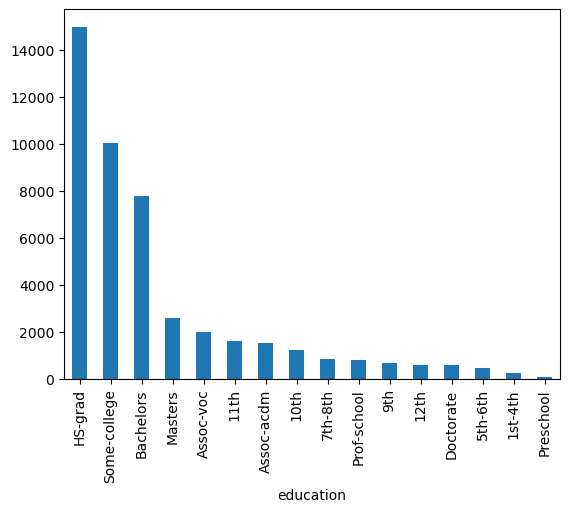

In [45]:
df1['education'].value_counts().plot(kind='bar')

## los primeras 3 categorías sellevan un número mayoritario de registros

<Axes: xlabel='marital-status'>

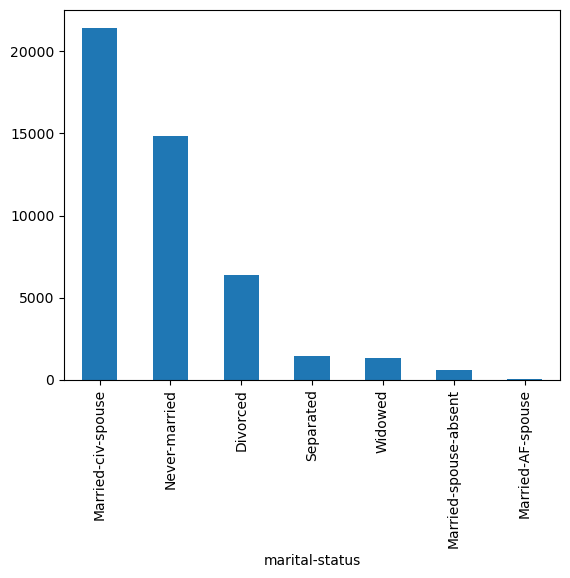

In [46]:
df1['marital-status'].value_counts().plot(kind='bar')

## predomina casados

<Axes: xlabel='relationship'>

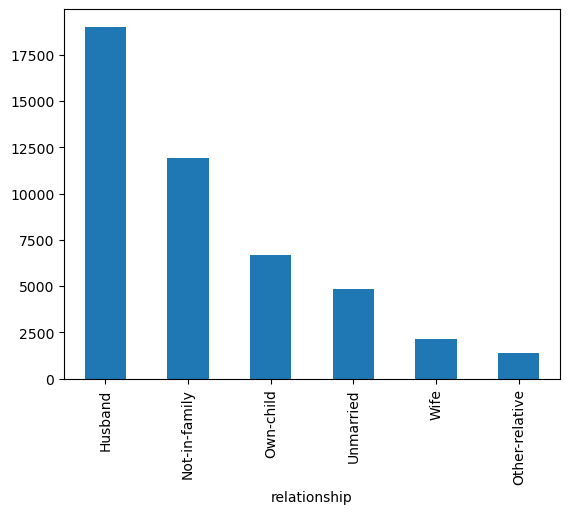

In [47]:
df1['relationship'].value_counts().plot(kind='bar')

## Parece que tiene cierto sentido por el predominio de hombres y estadi civil casado

<Axes: title={'center': 'Distribución edades'}, xlabel='age', ylabel='Ocurrencia'>

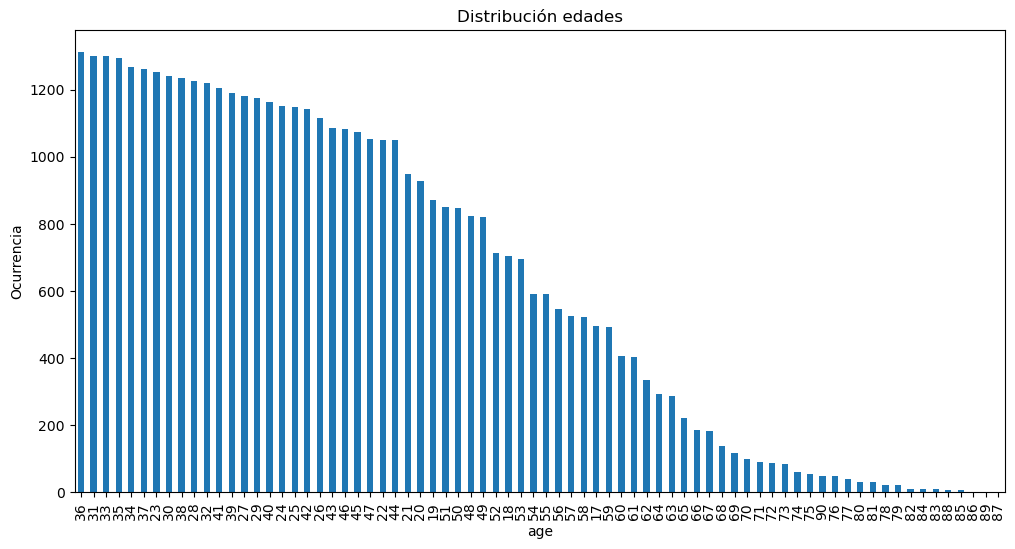

In [48]:
df1['age'].value_counts().plot(kind='bar',figsize=(12,6),title='Distribución edades',ylabel='Ocurrencia')

## para la edad conviene analizar armar binds y armar rango de edades

In [49]:
df1['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Name: count, dtype: int64

<Axes: title={'center': 'Distribución clases de trabajos'}, xlabel='workclass', ylabel='Ocurrencia'>

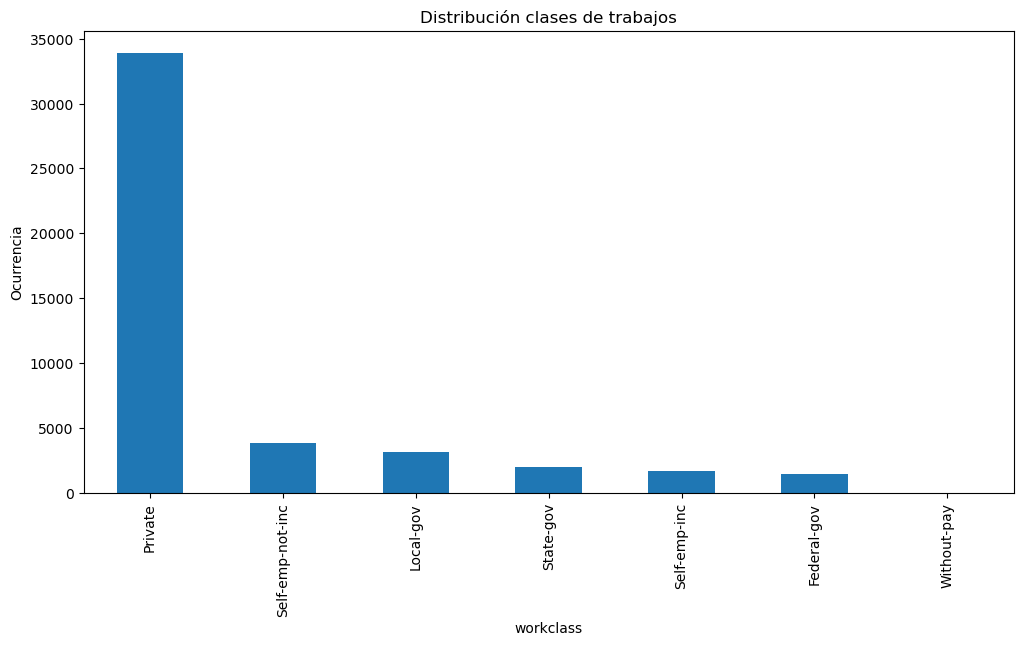

In [50]:
df1['workclass'].value_counts().plot(kind='bar',figsize=(12,6),title='Distribución clases de trabajos',ylabel='Ocurrencia')

## El sector privado es el sector que más requiere de trabajadores

# Data wrangling


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46033 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             46033 non-null  int64 
 1   workclass       46033 non-null  object
 2   fnlwgt          46033 non-null  int64 
 3   education       46033 non-null  object
 4   marital-status  46033 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    46033 non-null  object
 7   race            46033 non-null  object
 8   sex             46033 non-null  object
 9   hours-per-week  46033 non-null  int64 
 10  native-country  45778 non-null  object
 11  income          46033 non-null  object
dtypes: int64(3), object(9)
memory usage: 4.6+ MB


## Reviso que campos tienen NaN y su cantidad

In [52]:
df1.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
hours-per-week      0
native-country    255
income              0
dtype: int64

### Hay que analizar 'Native-country' que tiene 255 registros con nan

In [53]:
df1.shape

(46033, 12)

In [54]:
sum(df1.isna().sum())

255

In [55]:
df1[df1['native-country'].isna()]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
32580,40,Private,85019,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,45,NaN,>50K.
32626,41,Private,109912,Bachelors,Never-married,Other-service,Not-in-family,White,Female,40,NaN,<=50K.
32644,44,Self-emp-inc,223881,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,NaN,>50K.
32749,34,State-gov,513100,Bachelors,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,40,NaN,<=50K.
32814,42,Federal-gov,177937,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,40,NaN,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...
48245,46,Private,31411,11th,Married-civ-spouse,Other-service,Wife,White,Female,40,NaN,<=50K.
48272,24,Private,127159,Some-college,Never-married,Other-service,Other-relative,White,Female,24,NaN,<=50K.
48604,24,State-gov,161783,Bachelors,Never-married,Transport-moving,Not-in-family,Black,Male,40,NaN,<=50K.
48651,34,Private,143776,Masters,Never-married,Prof-specialty,Not-in-family,Black,Male,45,NaN,>50K.


In [56]:
moda_nacionalidad=df1['native-country'].mode()[0]
moda_nacionalidad

'United-States'

In [57]:
df1['native-country'].value_counts()

native-country
United-States                 41292
Mexico                          903
?                               556
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru         

### Me encontré con 556 registros '?' en la columna 'native-country'!!!

In [58]:
df1[df1['native-country'] == '?']

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
14,40,Private,121772,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,40,?,>50K
38,31,Private,84154,Some-college,Married-civ-spouse,Sales,Husband,White,Male,38,?,>50K
51,18,Private,226956,HS-grad,Never-married,Other-service,Own-child,White,Female,30,?,<=50K
93,30,Private,117747,HS-grad,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,35,?,<=50K
245,56,Private,203580,HS-grad,Married-civ-spouse,Adm-clerical,Husband,White,Male,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32413,45,Private,199590,5th-6th,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,?,<=50K
32449,44,Self-emp-inc,71556,Masters,Married-civ-spouse,Sales,Husband,White,Male,50,?,>50K
32469,58,Self-emp-inc,181974,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Female,99,?,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,Divorced,Sales,Own-child,White,Male,50,?,<=50K


In [59]:
df1['native-country'].fillna(value=moda_nacionalidad,inplace=True)

In [60]:
df1.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [61]:
df1.replace(to_replace='?',value=moda_nacionalidad,inplace=True)
df1['native-country'].value_counts()

native-country
United-States                 42103
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador      

In [62]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,46033.0,NaN,NaN,NaN,38.556601,13.204268,17.0,28.0,37.0,47.0,90.0
workclass,46033,7,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,46033.0,NaN,NaN,NaN,189805.122803,105474.732488,13492.0,117606.0,178353.0,237865.0,1490400.0
education,46033,16,HS-grad,14972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital-status,46033,7,Married-civ-spouse,21451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,46033,14,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,46033,6,Husband,19005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,46033,5,White,39444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,46033,2,Male,31114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours-per-week,46033.0,NaN,NaN,NaN,40.948407,12.011069,1.0,40.0,40.0,45.0,99.0


In [63]:
df1.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46033 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             46033 non-null  int64 
 1   workclass       46033 non-null  object
 2   fnlwgt          46033 non-null  int64 
 3   education       46033 non-null  object
 4   marital-status  46033 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    46033 non-null  object
 7   race            46033 non-null  object
 8   sex             46033 non-null  object
 9   hours-per-week  46033 non-null  int64 
 10  native-country  46033 non-null  object
 11  income          46033 non-null  object
dtypes: int64(3), object(9)
memory usage: 4.6+ MB


## Análisis de OUTLIERS para los campos numéricos

<Axes: >

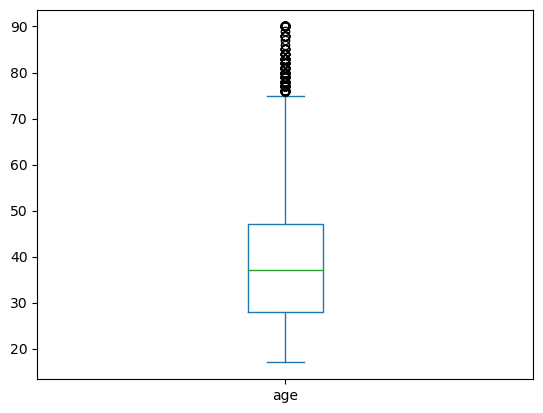

In [70]:
df1['age'].plot(kind='box')

In [85]:
q4_edad = np.percentile(df1['age'],95)
q1_edad = np.percentile(df1['age'],5)
print('Analisis intercuartil para edad')
print(f'percentile q4 es:', q4_edad)
print(f'percentile q1 es:', q1_edad)

Analisis intercuartil para edad
percentile q4 es: 62.0
percentile q1 es: 20.0


In [93]:
df1['age'][df1['age'] > q4_edad].count()

2166

### tenemos 2166 registros con personas que estan con edades superiores al cuartil 95 (cola superior)
#### esto podría indicar un problema social respecto a la clase pasiva...

<Axes: >

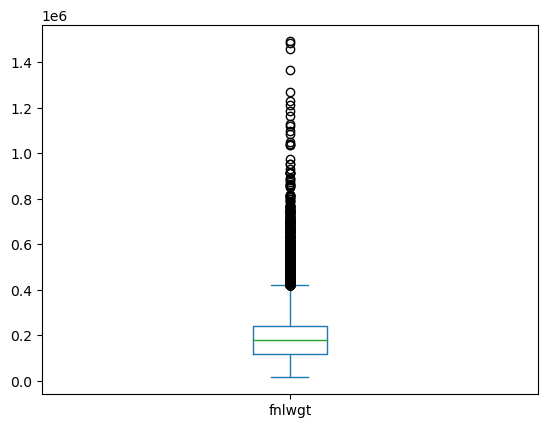

In [66]:
df1['fnlwgt'].plot(kind='box')

In [84]:
q4_fnlwgt = np.percentile(df1['fnlwgt'],95)
q1_fnlwgt = np.percentile(df1['fnlwgt'],5)
print('Analisis intercuartil para fnlwgt')
print(f'percentile q4 es:', q4_fnlwgt)
print(f'percentile q1 es:', q1_fnlwgt)

Analisis intercuartil para fnlwgt
percentile q4 es: 379412.0
percentile q1 es: 40095.0


### Este campo no se que información puede brindar...es candidato a eliminarse del dataset...

<Axes: >

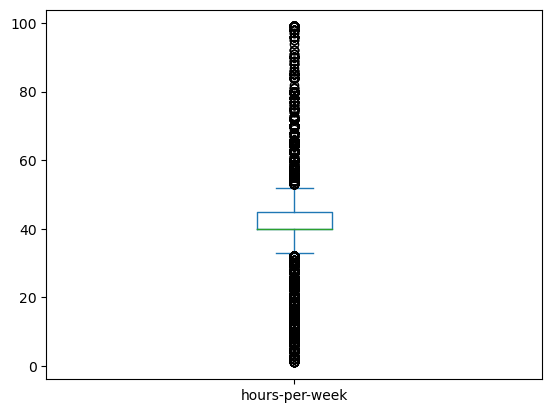

In [67]:
df1['hours-per-week'].plot(kind='box')

In [83]:
q4_horas = np.percentile(df1['hours-per-week'],95)
q1_horas = np.percentile(df1['hours-per-week'],5)
print('Analisis intercuartil para Horas trabajadas por semana')
print(f'percentile q4 es:', q4_horas)
print(f'percentile q1 es:', q1_horas)

Analisis intercuartil para Horas trabajadas por semana
percentile q4 es: 60.0
percentile q1 es: 20.0


In [101]:
df1['hours-per-week'][df1['hours-per-week'].isin([q1_horas,q4_horas])].count()

3752

In [102]:
df_final = df1.drop('fnlwgt',axis=1)
df_final.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


# Algunos análisis y procesamientos adicionales

from sklearn.preprocessing import OrdinalEncoder
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas.testing

#Clasificacion
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#regresión
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [103]:
df_x = df_final.drop('income',axis=1)
df_y = df_final['income']

       age         workclass  education      marital-status  \
0       39         State-gov  Bachelors       Never-married   
1       50  Self-emp-not-inc  Bachelors  Married-civ-spouse   
2       38           Private    HS-grad            Divorced   
3       53           Private       11th  Married-civ-spouse   
4       28           Private  Bachelors  Married-civ-spouse   
...    ...               ...        ...                 ...   
48836   33           Private  Bachelors       Never-married   
48837   39           Private  Bachelors            Divorced   
48839   38           Private  Bachelors  Married-civ-spouse   
48840   44           Private  Bachelors            Divorced   
48841   35      Self-emp-inc  Bachelors  Married-civ-spouse   

              occupation   relationship                race     sex  \
0           Adm-clerical  Not-in-family               White    Male   
1        Exec-managerial        Husband               White    Male   
2      Handlers-cleaners  Not-

In [105]:
df_x.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba


In [106]:
df_y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [107]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46033 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             46033 non-null  int64 
 1   workclass       46033 non-null  object
 2   education       46033 non-null  object
 3   marital-status  46033 non-null  object
 4   occupation      46033 non-null  object
 5   relationship    46033 non-null  object
 6   race            46033 non-null  object
 7   sex             46033 non-null  object
 8   hours-per-week  46033 non-null  int64 
 9   native-country  46033 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [115]:
columnas = df_x.select_dtypes(exclude=['int64']).columns
for i in columnas:
    categorias = df_x[i].unique()
    print(f'-------- \n Campo: {i} \n Categorias: {categorias} \n---------\n')

-------- 
 Campo: workclass 
 Categorias: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay'] 
---------

-------- 
 Campo: education 
 Categorias: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th'] 
---------

-------- 
 Campo: marital-status 
 Categorias: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 
---------

-------- 
 Campo: occupation 
 Categorias: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv'] 
---------

-------- 
 Campo: relationship 
 Categorias: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 
---------

-------- 
 Campo: rac

### son todas categóricas - debería convenrtirlas a numericas para mejorar el tratamiento ML

In [118]:
from sklearn.preprocessing import OrdinalEncoder

In [119]:
encoder = OrdinalEncoder()

In [120]:
encoder.fit(df_x)

OrdinalEncoder()

In [127]:
columnas = df_x.select_dtypes(exclude=['int64']).columns
for i in columnas:
    nuevo_campo = 'encoder_'+ i
    df_x[nuevo_campo] = encoder.fit_transform(df_x[[i]])


NameError: name 'X' is not defined

In [128]:
df_x.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,encoder_workclass,encoder_education,encoder_marital-status,encoder_occupation,encoder_relationship,encoder_race,encoder_sex,encoder_native-country
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,5.0,9.0,4.0,0.0,1.0,4.0,1.0,38.0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,4.0,9.0,2.0,3.0,0.0,4.0,1.0,38.0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,2.0,11.0,0.0,5.0,1.0,4.0,1.0,38.0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,2.0,1.0,2.0,5.0,0.0,2.0,1.0,38.0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,2.0,9.0,2.0,9.0,5.0,2.0,0.0,4.0


In [129]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46033 entries, 0 to 48841
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     46033 non-null  int64  
 1   workclass               46033 non-null  object 
 2   education               46033 non-null  object 
 3   marital-status          46033 non-null  object 
 4   occupation              46033 non-null  object 
 5   relationship            46033 non-null  object 
 6   race                    46033 non-null  object 
 7   sex                     46033 non-null  object 
 8   hours-per-week          46033 non-null  int64  
 9   native-country          46033 non-null  object 
 10  encoder_workclass       46033 non-null  float64
 11  encoder_education       46033 non-null  float64
 12  encoder_marital-status  46033 non-null  float64
 13  encoder_occupation      46033 non-null  float64
 14  encoder_relationship    46033 non-null  flo

In [130]:
df_x.describe().T

,count,mean,std,min,25%,50%,75%,max
age,46033.0,38.556601,13.204268,17.0,28.0,37.0,47.0,90.0
hours-per-week,46033.0,40.948407,12.011069,1.0,40.0,40.0,45.0,99.0
encoder_workclass,46033.0,2.205201,0.957854,0.0,2.0,2.0,2.0,6.0
encoder_education,46033.0,10.309256,3.813403,0.0,9.0,11.0,12.0,15.0
encoder_marital-status,46033.0,2.587796,1.497996,0.0,2.0,2.0,4.0,6.0
encoder_occupation,46033.0,5.979080,4.023434,0.0,2.0,6.0,9.0,13.0
encoder_relationship,46033.0,1.411965,1.597293,0.0,0.0,1.0,3.0,5.0
encoder_race,46033.0,3.672061,0.841747,0.0,4.0,4.0,4.0,4.0
encoder_sex,46033.0,0.675906,0.468040,0.0,0.0,1.0,1.0,1.0
encoder_native-country,46033.0,36.429192,6.029731,0.0,38.0,38.0,38.0,40.0


In [133]:
columnas_num = df_x.select_dtypes(exclude=['object']).columns
df_x_num = df_x[columnas_num]
df_x_num.head()

,age,hours-per-week,encoder_workclass,encoder_education,encoder_marital-status,encoder_occupation,encoder_relationship,encoder_race,encoder_sex,encoder_native-country
0,39,40,5.0,9.0,4.0,0.0,1.0,4.0,1.0,38.0
1,50,13,4.0,9.0,2.0,3.0,0.0,4.0,1.0,38.0
2,38,40,2.0,11.0,0.0,5.0,1.0,4.0,1.0,38.0
3,53,40,2.0,1.0,2.0,5.0,0.0,2.0,1.0,38.0
4,28,40,2.0,9.0,2.0,9.0,5.0,2.0,0.0,4.0


<Axes: >

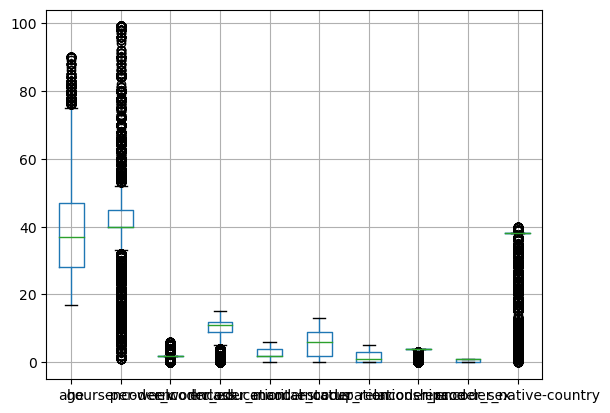

In [137]:
df_x_num.boxplot()

#### en una primera aproximación vemos que no es necesario realizar una normalización.
### seguimos teniendo muchos OUTLIERS

In [134]:
#Pearson Correlation
corr_matrix = df_x_num.corr()

print(corr_matrix)

                             age  hours-per-week  encoder_workclass  \
age                     1.000000        0.102185           0.085414   
hours-per-week          0.102185        1.000000           0.050254   
encoder_workclass       0.085414        0.050254           1.000000   
encoder_education      -0.004881        0.060216           0.017484   
encoder_marital-status -0.271917       -0.181351          -0.033646   
encoder_occupation     -0.005091        0.016093           0.017331   
encoder_relationship   -0.246611       -0.258283          -0.064867   
encoder_race            0.025596        0.041894           0.047925   
encoder_sex             0.081671        0.230204           0.069652   
encoder_native-country -0.002982        0.007706           0.004043   

                        encoder_education  encoder_marital-status  \
age                             -0.004881               -0.271917   
hours-per-week                   0.060216               -0.181351   
encoder_wor

<Axes: >

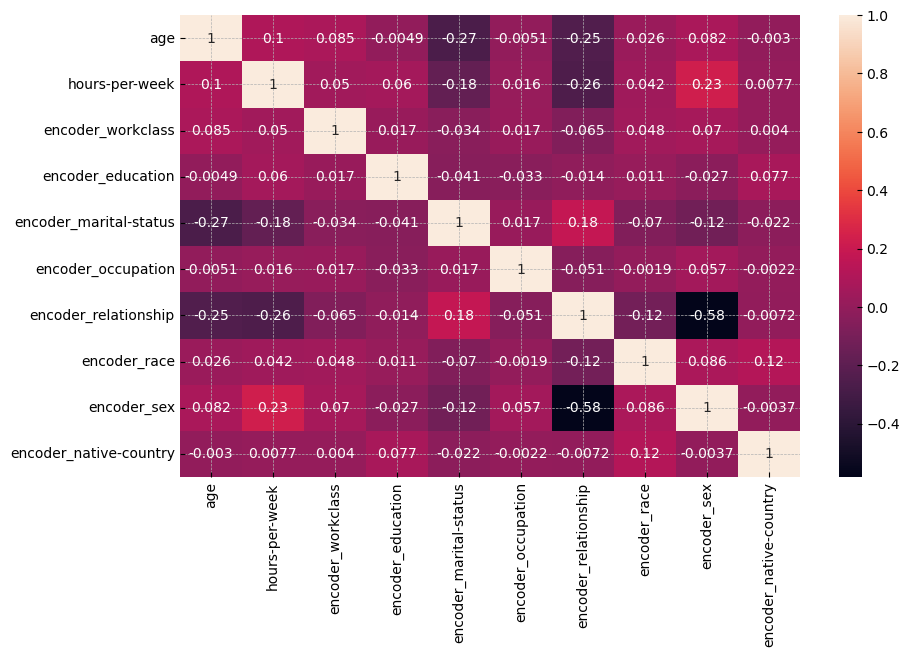

In [144]:
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(df_x_num.corr(), annot=True, ax=ax)
#, cmap=sns.cubehelix_palette(as_cmap=True)

### como las variables no son compatibles con distribuciones normales, pruebo la correlación con un método que se ajusta mejor y no se ve afectado por lo outliers

<Axes: >

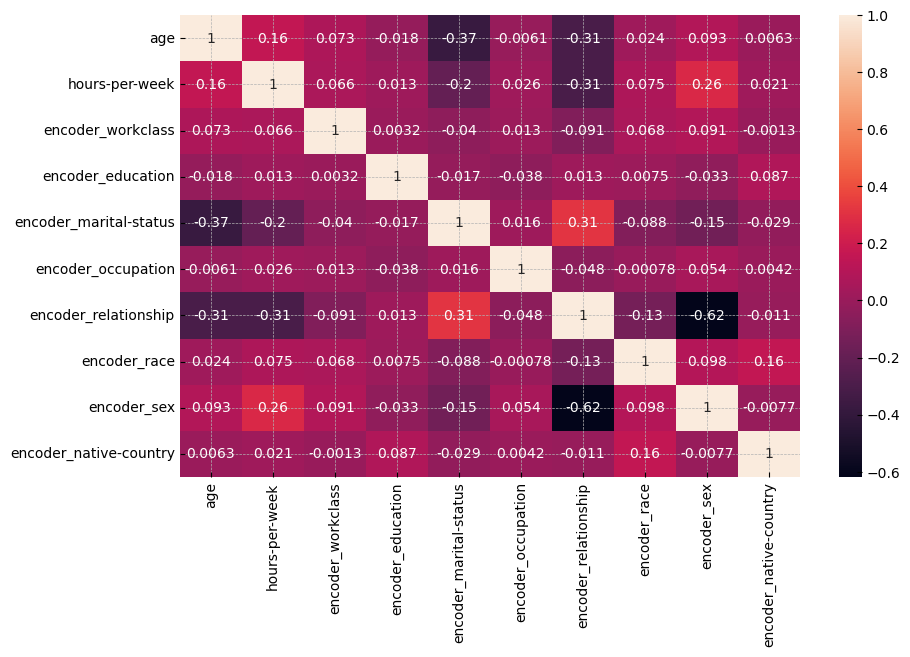

In [143]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_x_num.corr(method='spearman'), annot=True, ax=ax)

### Veo una correlación fuerte > 0,62  entre 'sex' y 'relatioship'